# Linear Regression Assignment
## Bike Sharing Assignment
### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes. How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

### Steps to be followed to build the linear regression model:
 1. Readin and understanding the data
 2. Visualising the data/ EDA
 3. Preparing the data for modeling (train-test split, rescaling etc.)
 4. Building the model with train data
 5. Residual Analysis and validating Linear Regrssion Assumptions
 6. Model Evaluation - R Sqaured Observation for Train Data
 7. Prediction and evaluation on the test set
 8. Final Observations on Test and Train data(Summary)

### Step 1: Reading and understanding the data
### 1.1 Reading Data
 - Importing required libraries to read the dataset

In [1]:
# Impporting numpy, pandas and matplotlib, seaborn to analyse and visualise data 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing scikit-learn library and other libraries for statistical analysis and to build the regression  model.
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#reading the data
df_bike = pd.read_csv('day.csv')
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


 ### 1.2 Understanding the structure of the data using shape, info(),describe

In [3]:
df_bike.shape

(730, 16)

Dataset has 730 rows and 16 columns

In [4]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
df_bike.size

11680

Below are the Findings from the dataset:
 - Dataset has 730 rows and 16 columns.
 - Except for dteday rest all columns have either integer or float as data type.
 - dteday has data type as object.
 - season, yr, month, holiday, weekday,workingday and weathersit are categorical, but the columns are represented in int format. 
 - other columns temp,atemp,hum, windspeed, casual, registered and cnt are numerical, represented in int/float format.

### Step 1.3 Data Qulaity Check
#### Check if any missing values
% of missing values:Columsn wise check

In [7]:
# checking the percentage of missing value for columns 
(df_bike.isnull().mean()/100).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### % of missing values:Row wise check

In [8]:
# checking the percentage of missing value for columns 
(df_bike.isnull().mean(axis=1)/100).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

#### Result Check:
 - There are no missing values either in rows or columns

#### Check for Duplicates

In [9]:
bike_duplicates = df_bike

In [10]:
bike_duplicates.drop_duplicates(inplace=True)

In [11]:
bike_duplicates.shape

(730, 16)

In [12]:
df_bike.shape

(730, 16)

#### Result Check:
 - After performing drop_duplicates() on "bike_duplicates", the shape of the dataframe doesn't change and it is similar to original dataframe "bike_data".Hence there are no duplicate values in the given data set

### 1.4 Data Cleaning 
We can Remove following Columns from the bike dataset:
 1. <b> instant:</b> record index - We can drop instant as it has index number, will not be required for the prediction.
 2. <b> dteday: </b> date - We can drop dteday as month and weekday are available
 3. As total Counts are available we can drop:
    - <b> casual: </b> count of casual users
    - <b> registered: </b> count of registered users


In [13]:
# Deleting column instant
df_bike.drop(['instant'], axis = 1, inplace = True)

In [14]:
# Deleting column dteday
df_bike.drop(['dteday'], axis = 1, inplace = True)

In [15]:
# Deleting column casual
df_bike.drop(['casual'], axis = 1, inplace = True)

In [16]:
# Deleting column registered 
df_bike.drop(['registered'], axis = 1, inplace = True)

In [17]:
df_bike.head() # providing first 5 rows of the dataset 

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 1.5 Handling outliers

In [18]:
df_bike.columns # checking the columns after deletion 

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [19]:
df_bike.nunique() #gives info about unique values present in data

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

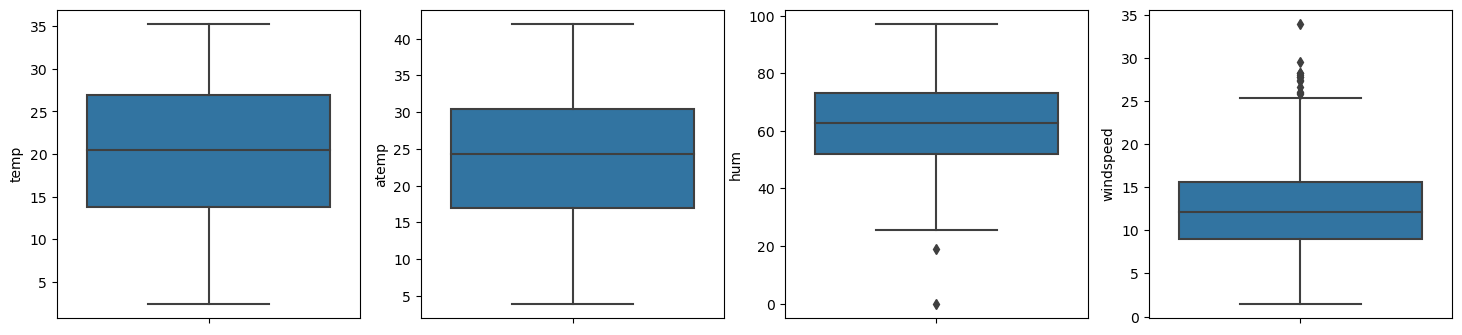

In [20]:
# checking outlies of numerical independent variables using boxplot
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df_bike)
    i+=1

#### From the above plots it is clear that we don't have any abbrent values for numerical columns

### 1.6 changing categorical data which were primarily numeric to more meaningful one

In [21]:
#changing categorical data which were primarily numeric to more meaningful one
df_bike.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df_bike.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df_bike.mnth = df_bike.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df_bike.weekday = df_bike.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Step 2: Visualising the data/ Exploratory Data Analysis 

Exploratory Data Analysis (EDA) is the critical first step in the data analysis process, providing invaluable insights into the characteristics, patterns, and relationships within the dataset. EDA allows us to uncover hidden trends, detect anomalies, and formulate hypotheses, setting the foundation for informed decision-making and subsequent statistical modeling.

#### Here we will perform the below data analysis steps:

  - <b> Univariate Analysis </b> 
 
    - Visualizing numerical variables using histogram and box plot.
    - Visualizing categorical variables using count plot.
 - <b> Bivariate Analysis </b> 
 
   - Visualizing numerical variables using scatter or pairplots in order to interpret business /domain inferences.
   - Visualizing categorical variables using barplots
 - <b> Multivariate Analysis <b> 
    
    - Visualizing mumerical variable corelation using headmap.

### 2.1 Univariate Analysis

#### Visualizing numerical variables using histogram and boxplot

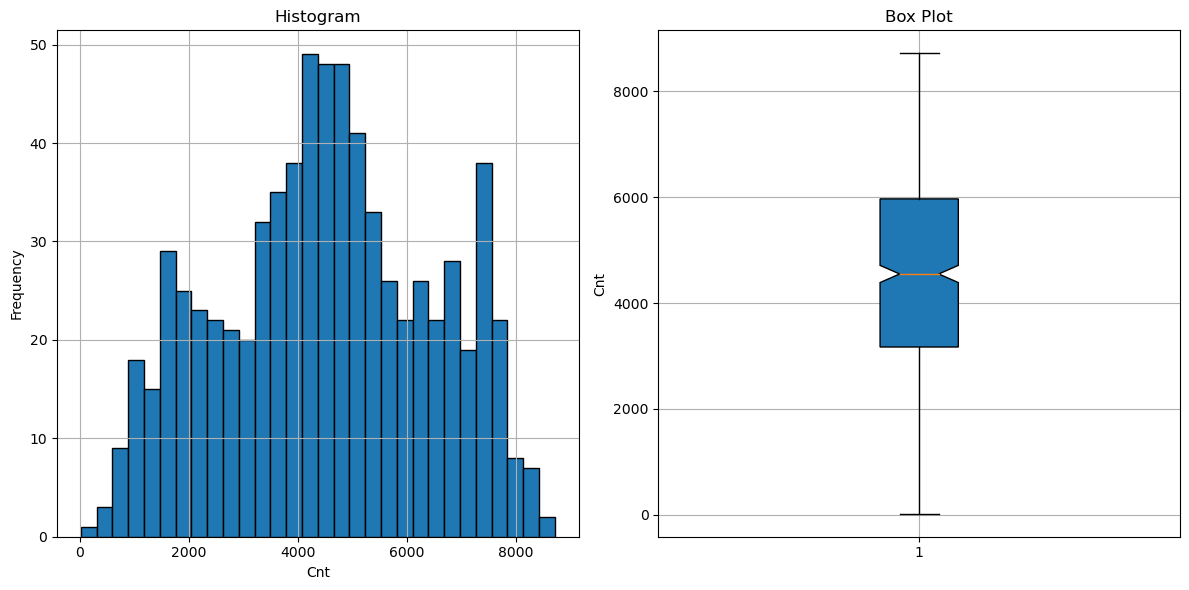

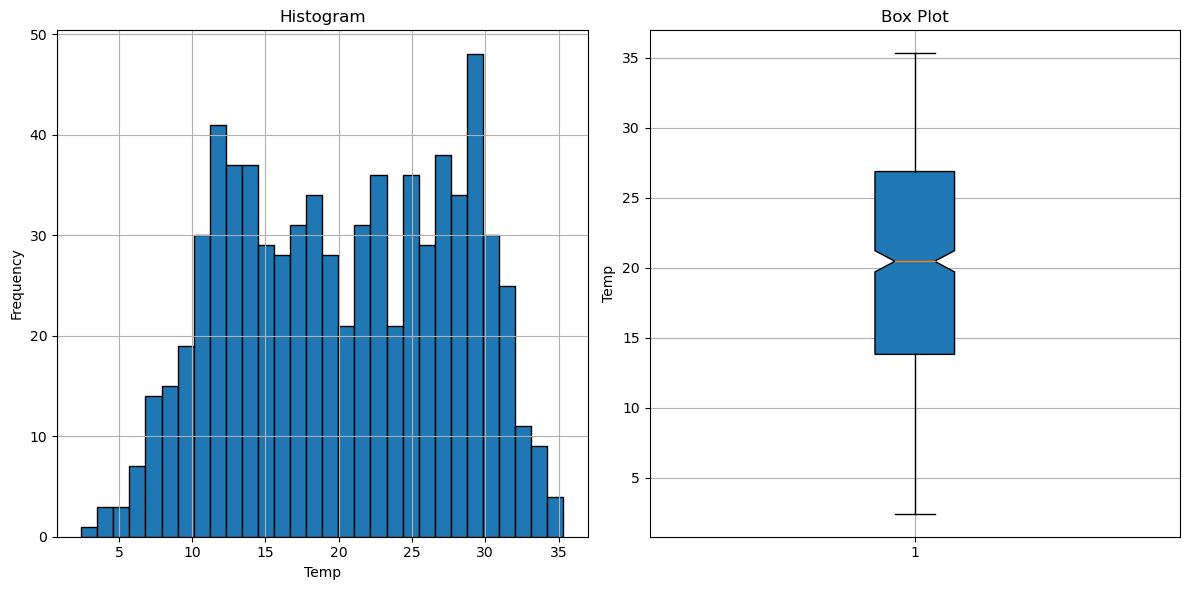

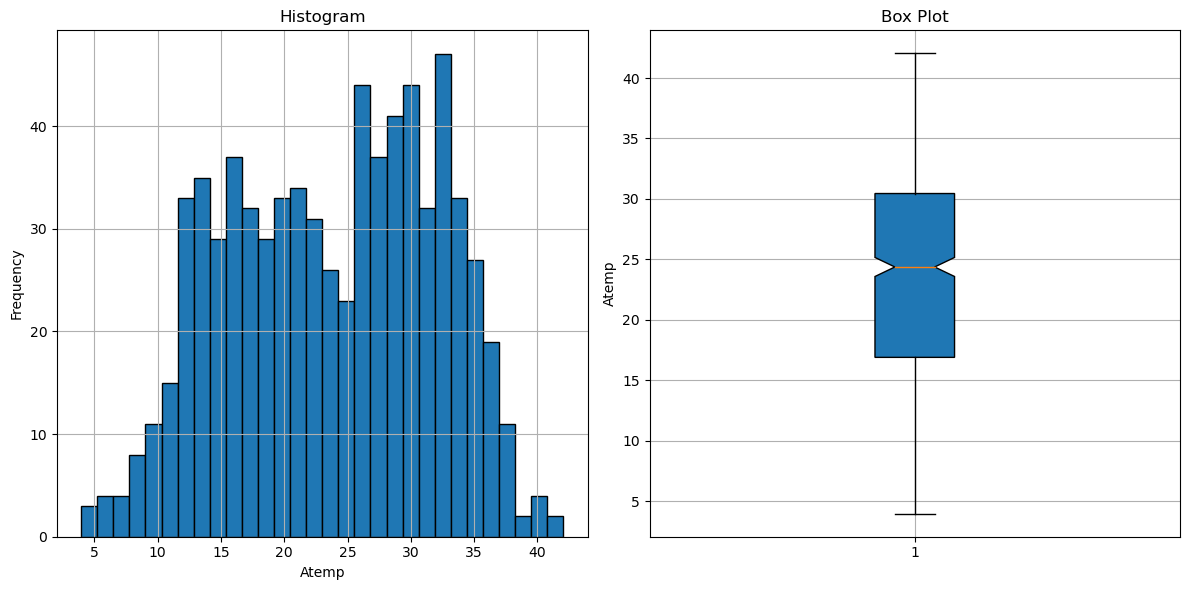

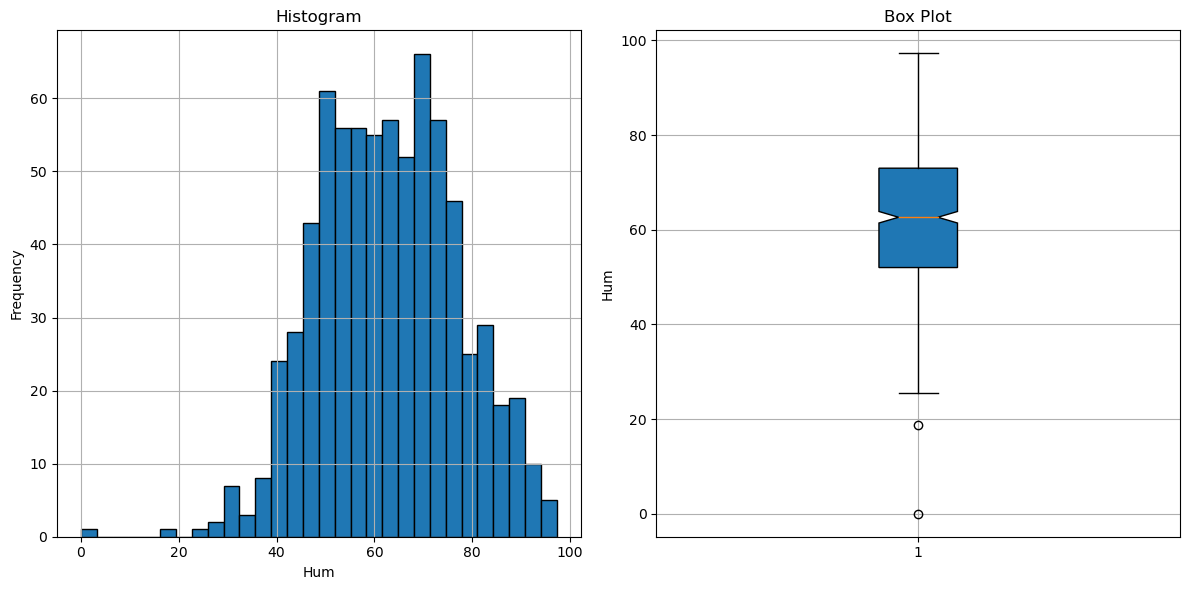

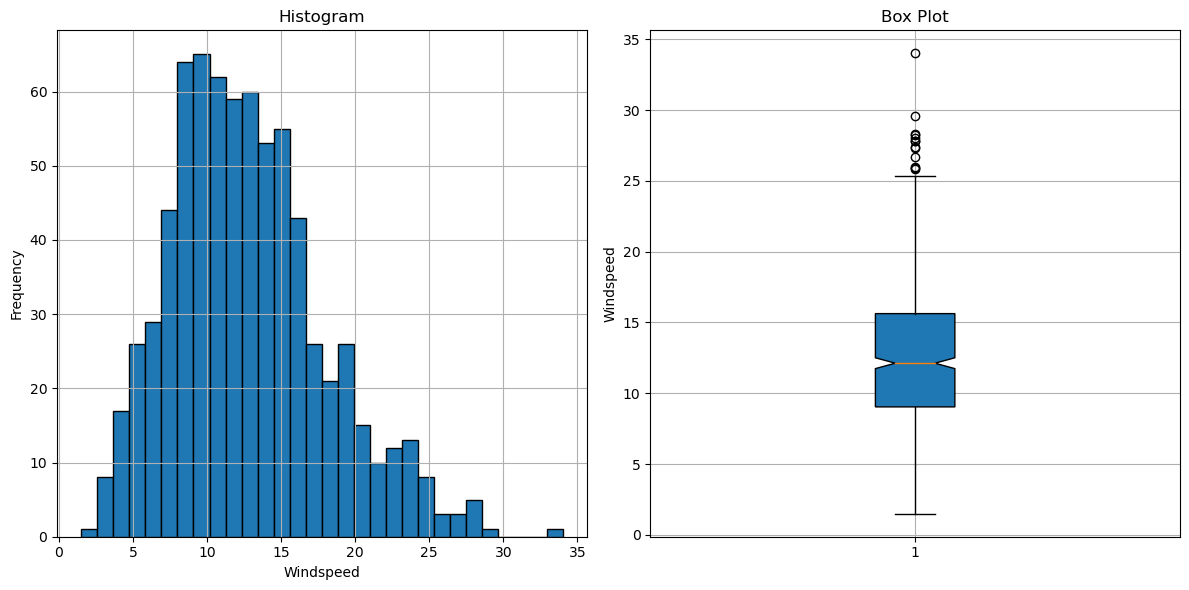

In [22]:
# creating visual graphs for numerical values 
num_cols = ['cnt', 'temp', 'atemp', 'hum','windspeed']

for col in num_cols:
    data = df_bike[col]
    col_name = col.replace('_', ' ').title()
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Plotting histogram
    axs[0].hist(data.sort_values(), bins=30, edgecolor='black')
    axs[0].set_title('Histogram')
    axs[0].set_xlabel(col_name)
    axs[0].set_ylabel('Frequency')
    axs[0].grid(True)

    # Plotting box plot
    axs[1].boxplot(data.sort_values(), patch_artist=True, notch=True)
    axs[1].set_title('Box Plot')
    axs[1].set_ylabel(col_name)
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()


### Inference from the above histogram and boxplot of Numerical variables:
 - The count of total rental bike has a mean aorund 4500. The frequency of the rental bike count is more between 2500-5700.
 - The temperature varies thorugh out the year and the mean temperature is around 27 degree celcuis. 
 - The feeling temperature frequecny is more between 11-35 degree celcius. 
 - The mean of humidity is around 62 and the frequency is more between 40-75.
 - The Windspeed mean is around 12 and the frequency is more between 5-20.

### Visualizing categorical variables using count plot:

In [23]:
df_bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

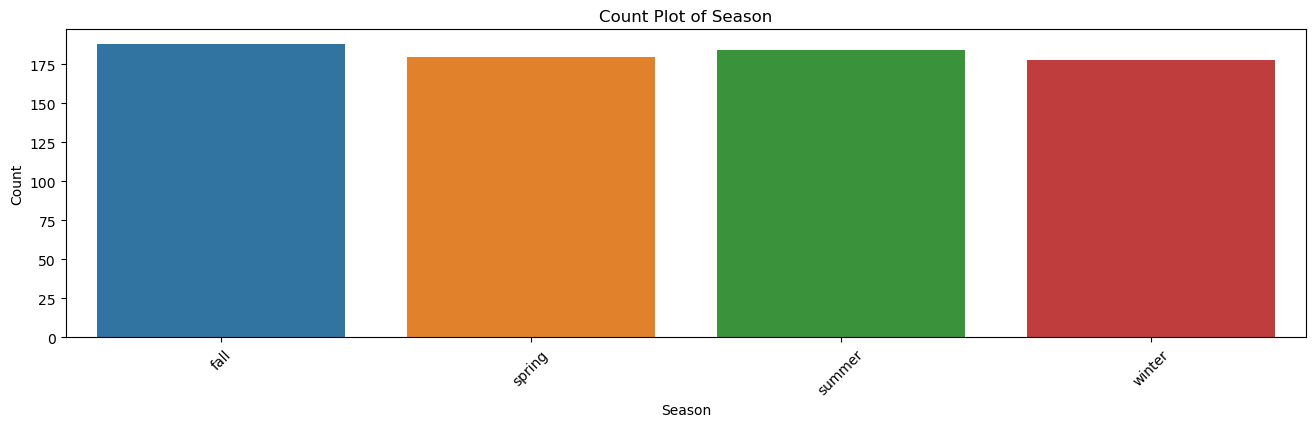

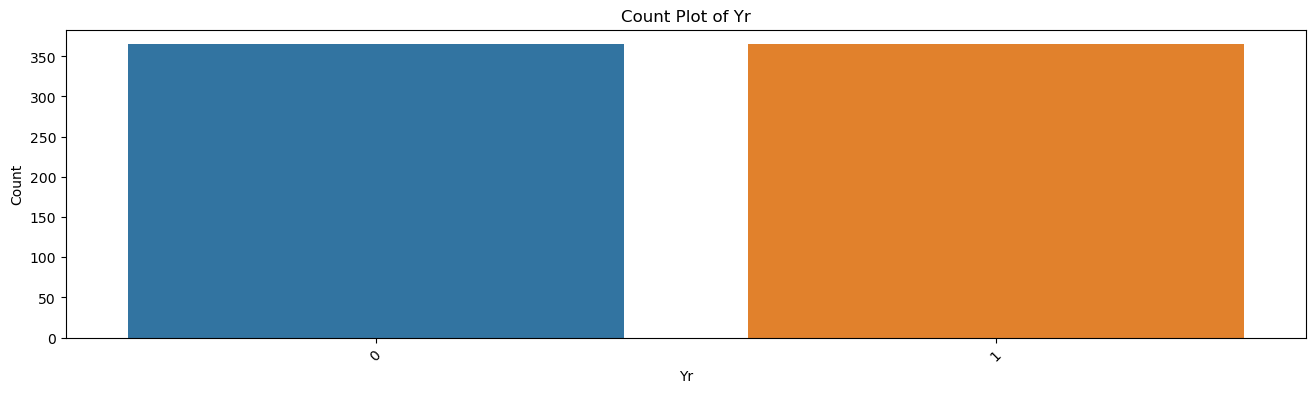

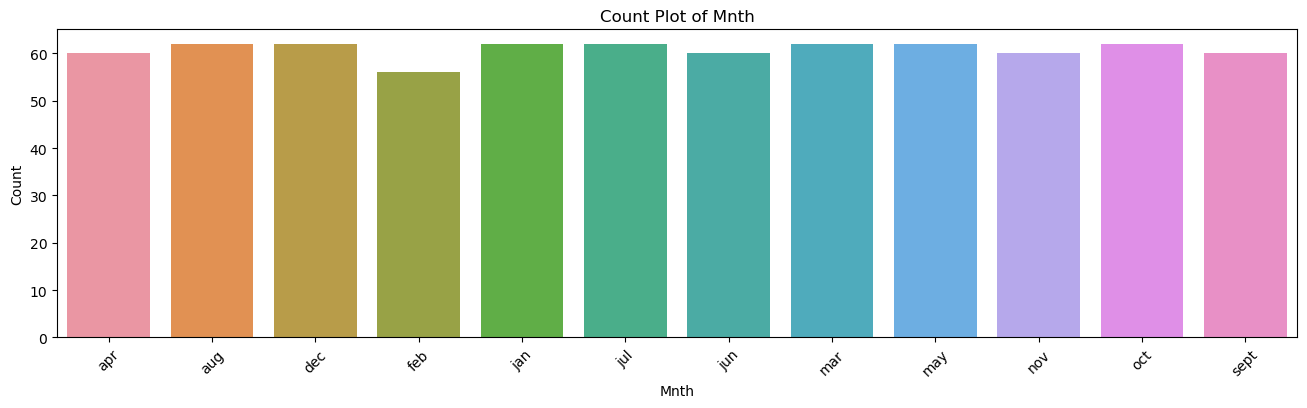

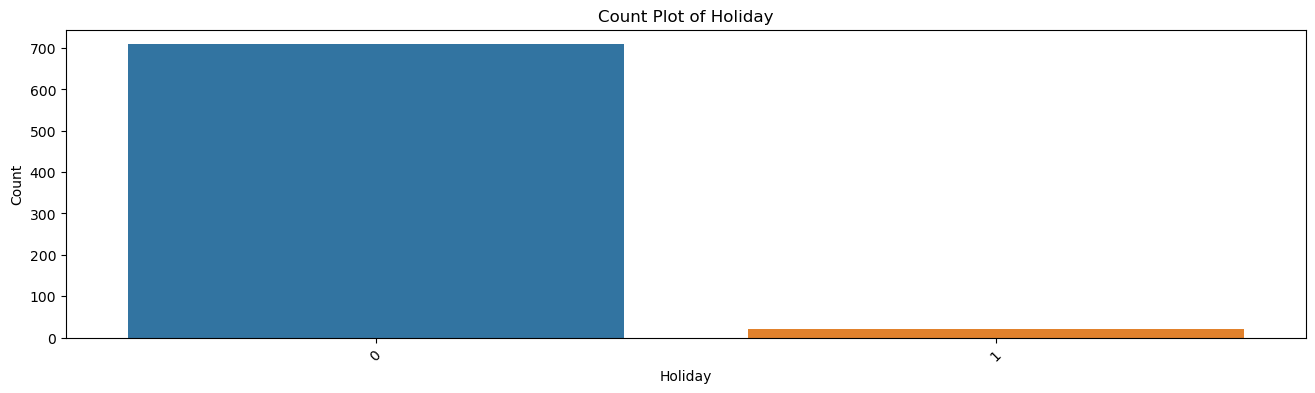

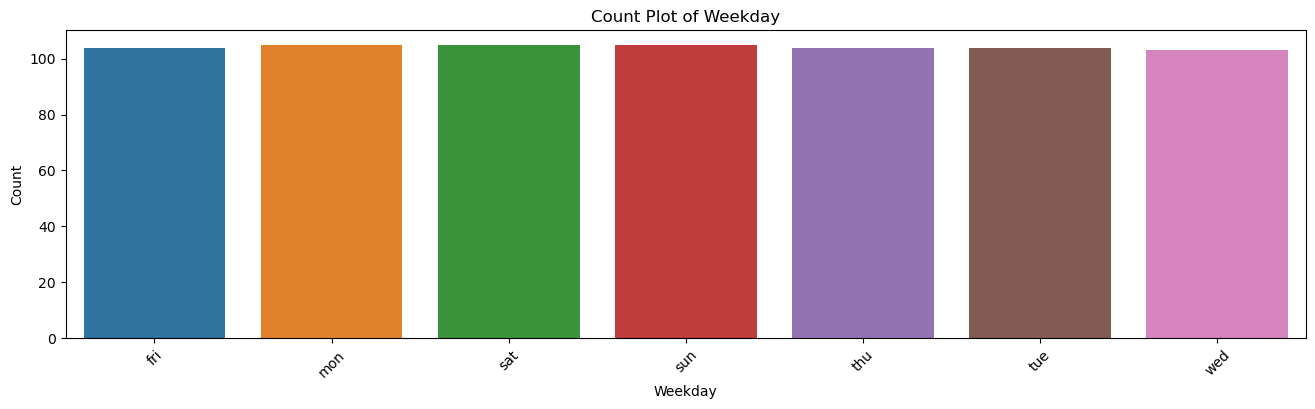

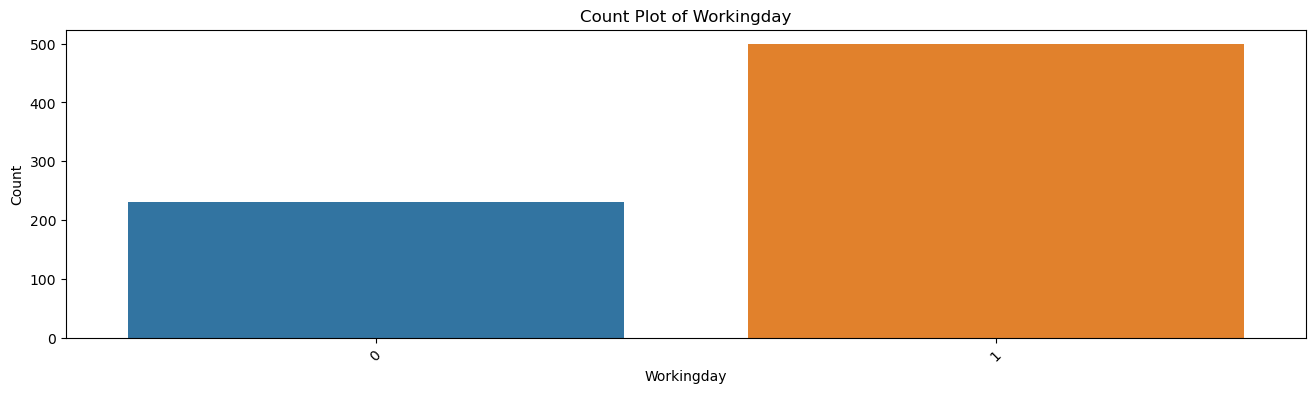

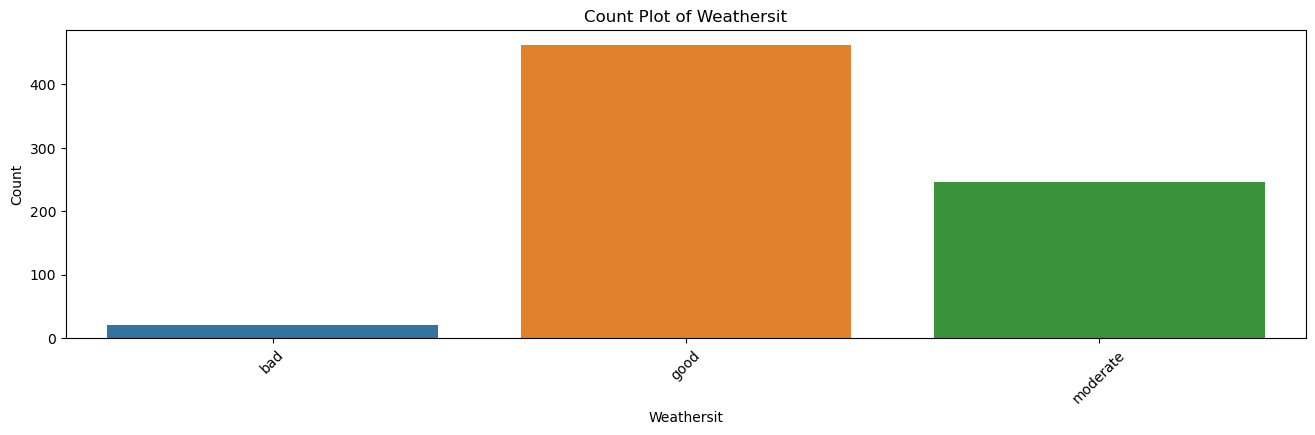

In [24]:
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in cat_cols:
    col_name = col.replace('_', ' ').title()
    plt.figure(figsize=(16, 4))

    sns.countplot(x=df_bike[col].sort_values())
    plt.xticks(rotation=45)

    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.title('Count Plot of '+col_name)
    plt.show()

### Inference from the above count plot of Categorical variables:
 - The frequency is more during workingdays than holidays.
 - The frequency is more in clear weather(good, moderate) than bad weather.

### 2.2 Bivariate Analysis

### Visualising Numeric Variables
preparing pairplot of all the numeric variables

<Figure size 1200x2500 with 0 Axes>

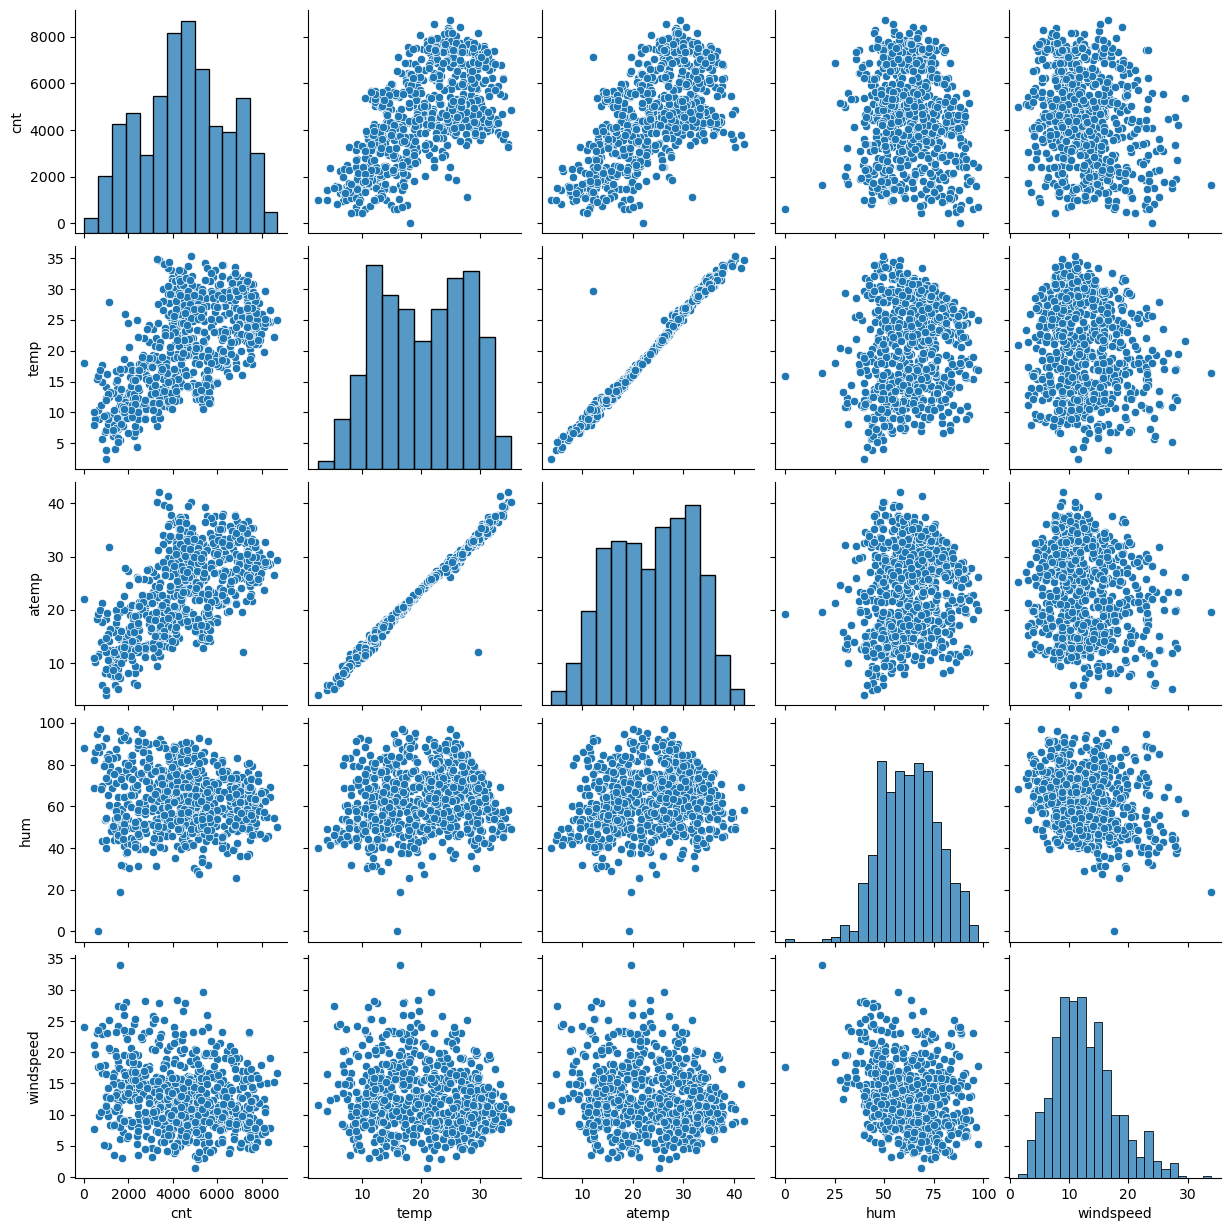

In [25]:
#Drawing pairplots for numeric variables

plt.figure(figsize = (12,25))
sns.pairplot(data=df_bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Inference from pairplot of numerical variables:
- The vraibles 'temp' shows a linear correlation between the dependent variable 'cnt'.
- The vraibles 'atemp' shows a linear correlation between the dependent variable 'cnt'.

### Visualising Category Variables
Preparing boxplot for all the Category variables

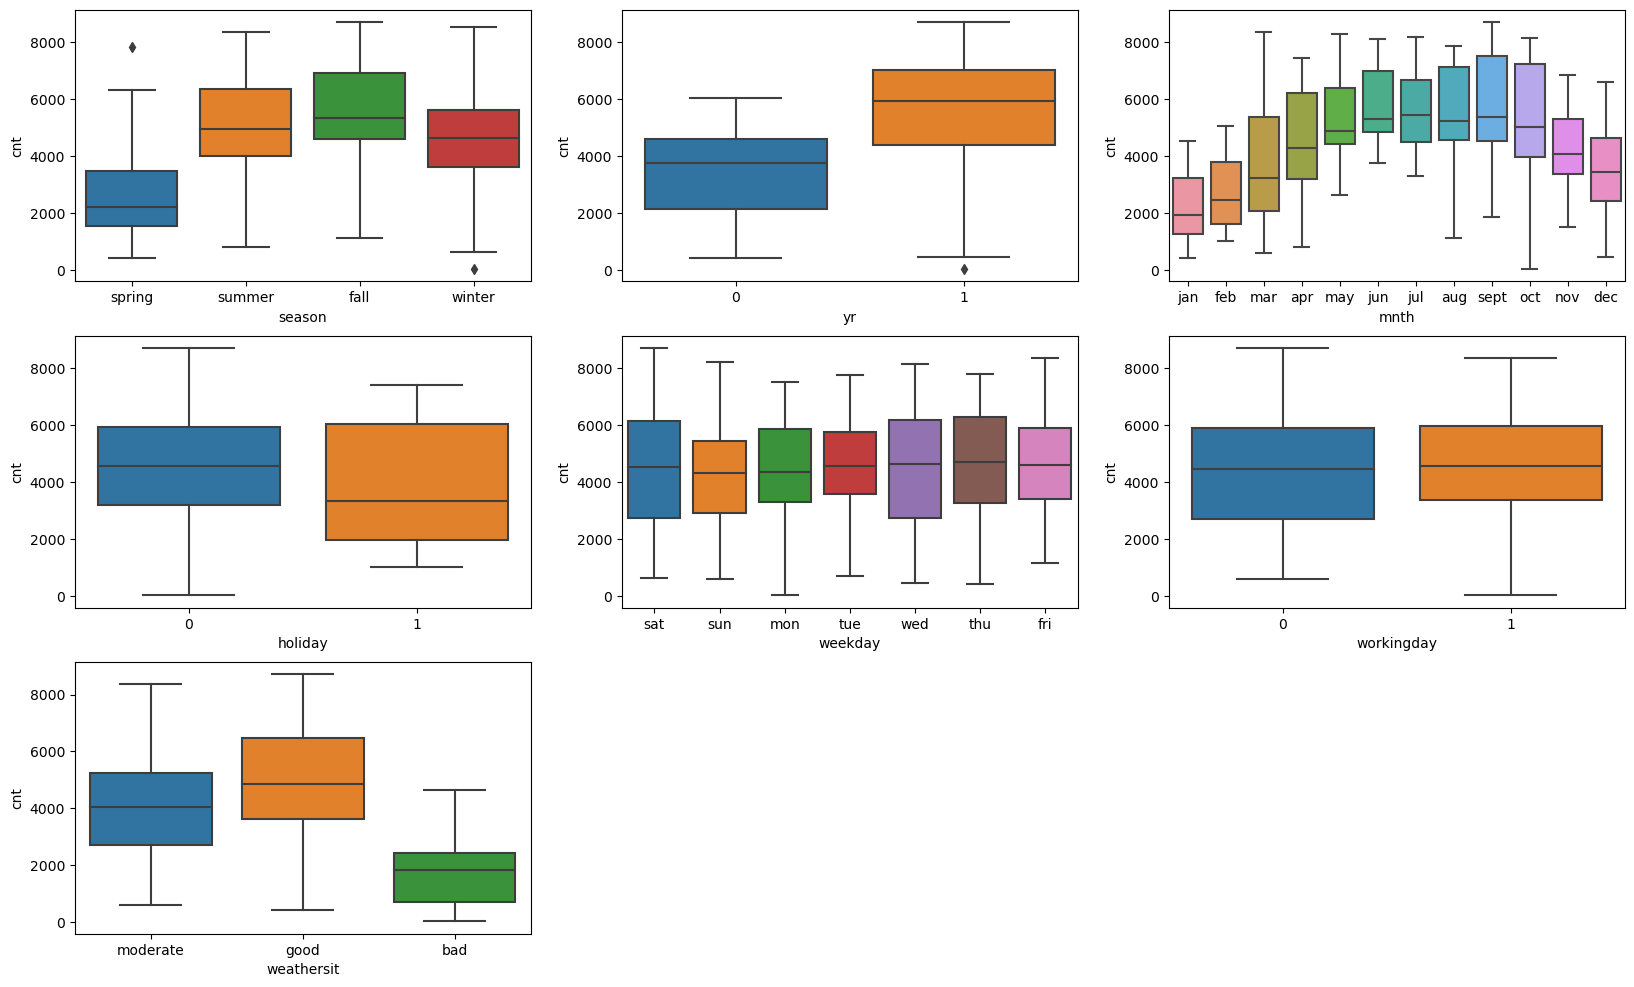

In [26]:
# mapping boxplot for categorical variables
plt.figure(figsize=(20, 12))

plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike)

plt.subplot(3,3,2)
sns.boxplot(x='yr', y= 'cnt', data=df_bike)

plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bike)

plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike)

plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike)

plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=df_bike)
plt.show()


### Inference from the boxplot of categorical variables:
 - fall Season has highest demand for rental bikes followed by summer and winter. In Spring season the bike demand is low.
 - There is an increase in bike demand in next year 2019 compare to last year 2018
 - September month has highest demand for bikes while November December Jaunuary and February has the least demand, can be due to extreme weather conditions.
 - Holiday have affected the mean demand negatively.
 - No proper inference about bike demand can be drawn from Weekday.
 - In working day the demand is slightly more as compared to the non-working days. 
 - People have higher demand of bike during clear weather situations and lowest during bad weathers.

### 2.3 Multivariate Analysis
Visualizing mumerical variable corelation using headmap.

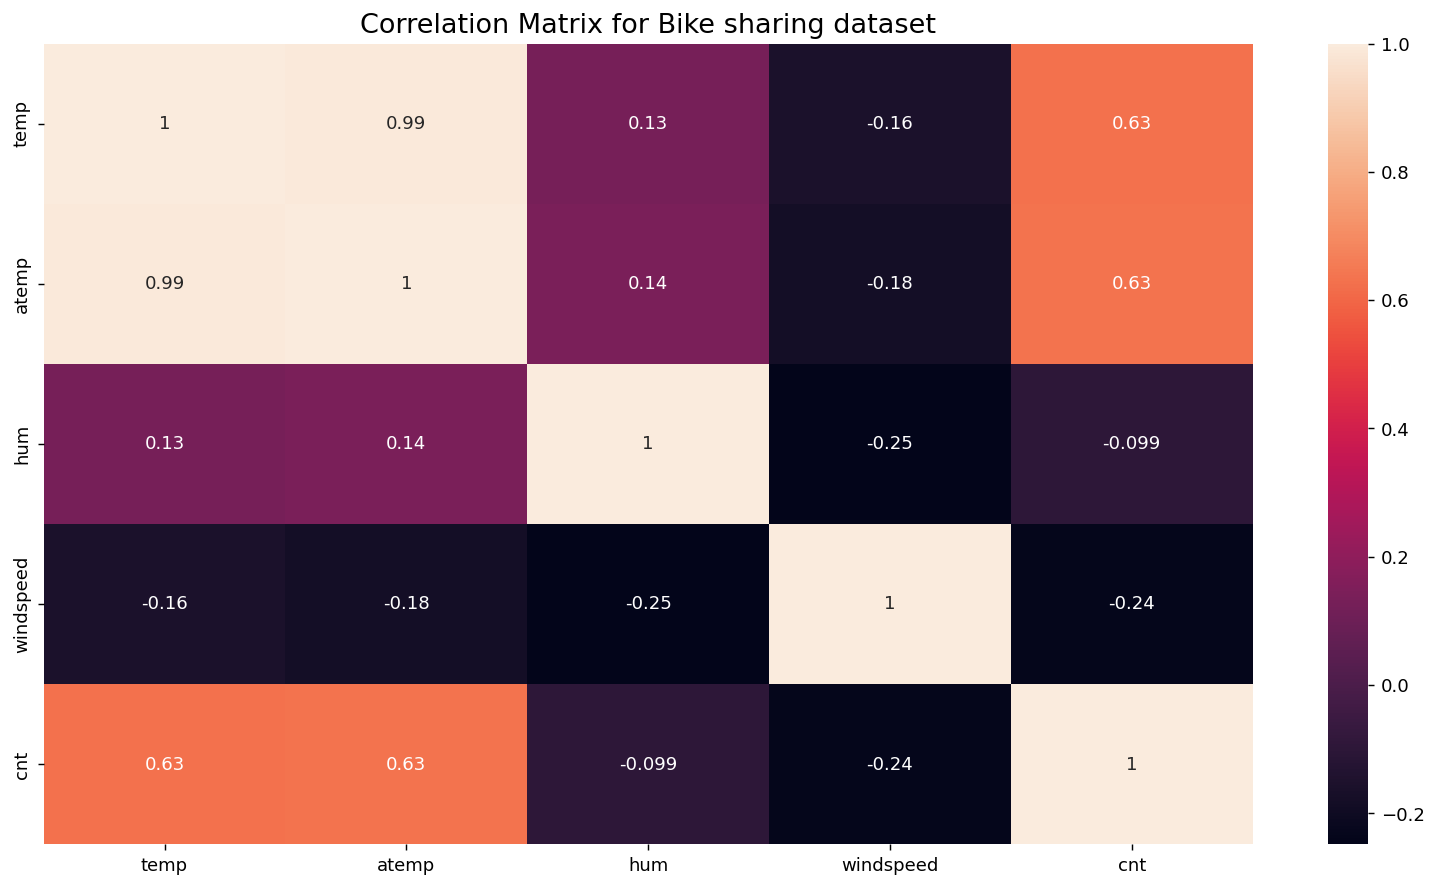

In [27]:
#Checking Heat map for numeric variables
num_vars = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation Matrix for Bike sharing dataset",fontsize=15)
sns.heatmap(df_bike[num_vars].corr(),annot= True)
plt.show()

### Inference of multivariate analysis of numerical variables:
 - By observing pair plots and heat map we can see that the temp and atemp has the highest corelation with the target variable cnt

 - temp and atemp are highly co-related with each other

 - output variable has a linear relationship with variables like temp, atemp.

### Step 3: Data Preparation for modeling
In the data preparation of multilinear regression, we will follow the below steps
 - Creating dummy variables for categorical variables
 - Splitting into train and test data 
 - Scaling 
### 3.1 Creating dummy variables for categorical variables

In [28]:
# creating dummy variables 
# dropping the redudant dummy variables
df_bike = pd.get_dummies(data=df_bike,columns=["season","mnth","weekday"],drop_first=True,dtype=int)
df_bike = pd.get_dummies(data=df_bike,columns=["weathersit"],dtype=int)

In [29]:
# checking columns after creating dummy variables 
df_bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [30]:
# checking data after creating dummy variables 
df_bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,1,0,1,0


### Observation:
Created dummy variables for categorical columns, the dataset now has 31 columns.

### 3.2 Splitting into train and test data 
 - Split the data to Train and Test: - We will split the data into TRAIN and TEST in 70:30 ratio
 - We will use train_test_split method from sklearn package for this, we have already imported this package

In [31]:
# checking the number of rows and columns 
df_bike.shape

(730, 31)

In [32]:
# We specify 'random_state' so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df_bike, train_size = 0.70, random_state = 100)

In [33]:
# Lets cross verify the shape of test and train data
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


In [34]:
# Check train dataset info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   temp                 510 non-null    float64
 4   atemp                510 non-null    float64
 5   hum                  510 non-null    float64
 6   windspeed            510 non-null    float64
 7   cnt                  510 non-null    int64  
 8   season_spring        510 non-null    int32  
 9   season_summer        510 non-null    int32  
 10  season_winter        510 non-null    int32  
 11  mnth_aug             510 non-null    int32  
 12  mnth_dec             510 non-null    int32  
 13  mnth_feb             510 non-null    int32  
 14  mnth_jan             510 non-null    int32  
 15  mnth_jul             510 non-null    int32 

In [35]:
# checking test dataset info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   220 non-null    int64  
 1   holiday              220 non-null    int64  
 2   workingday           220 non-null    int64  
 3   temp                 220 non-null    float64
 4   atemp                220 non-null    float64
 5   hum                  220 non-null    float64
 6   windspeed            220 non-null    float64
 7   cnt                  220 non-null    int64  
 8   season_spring        220 non-null    int32  
 9   season_summer        220 non-null    int32  
 10  season_winter        220 non-null    int32  
 11  mnth_aug             220 non-null    int32  
 12  mnth_dec             220 non-null    int32  
 13  mnth_feb             220 non-null    int32  
 14  mnth_jan             220 non-null    int32  
 15  mnth_jul             220 non-null    int32 

In [36]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

### Checking Correlation between variables

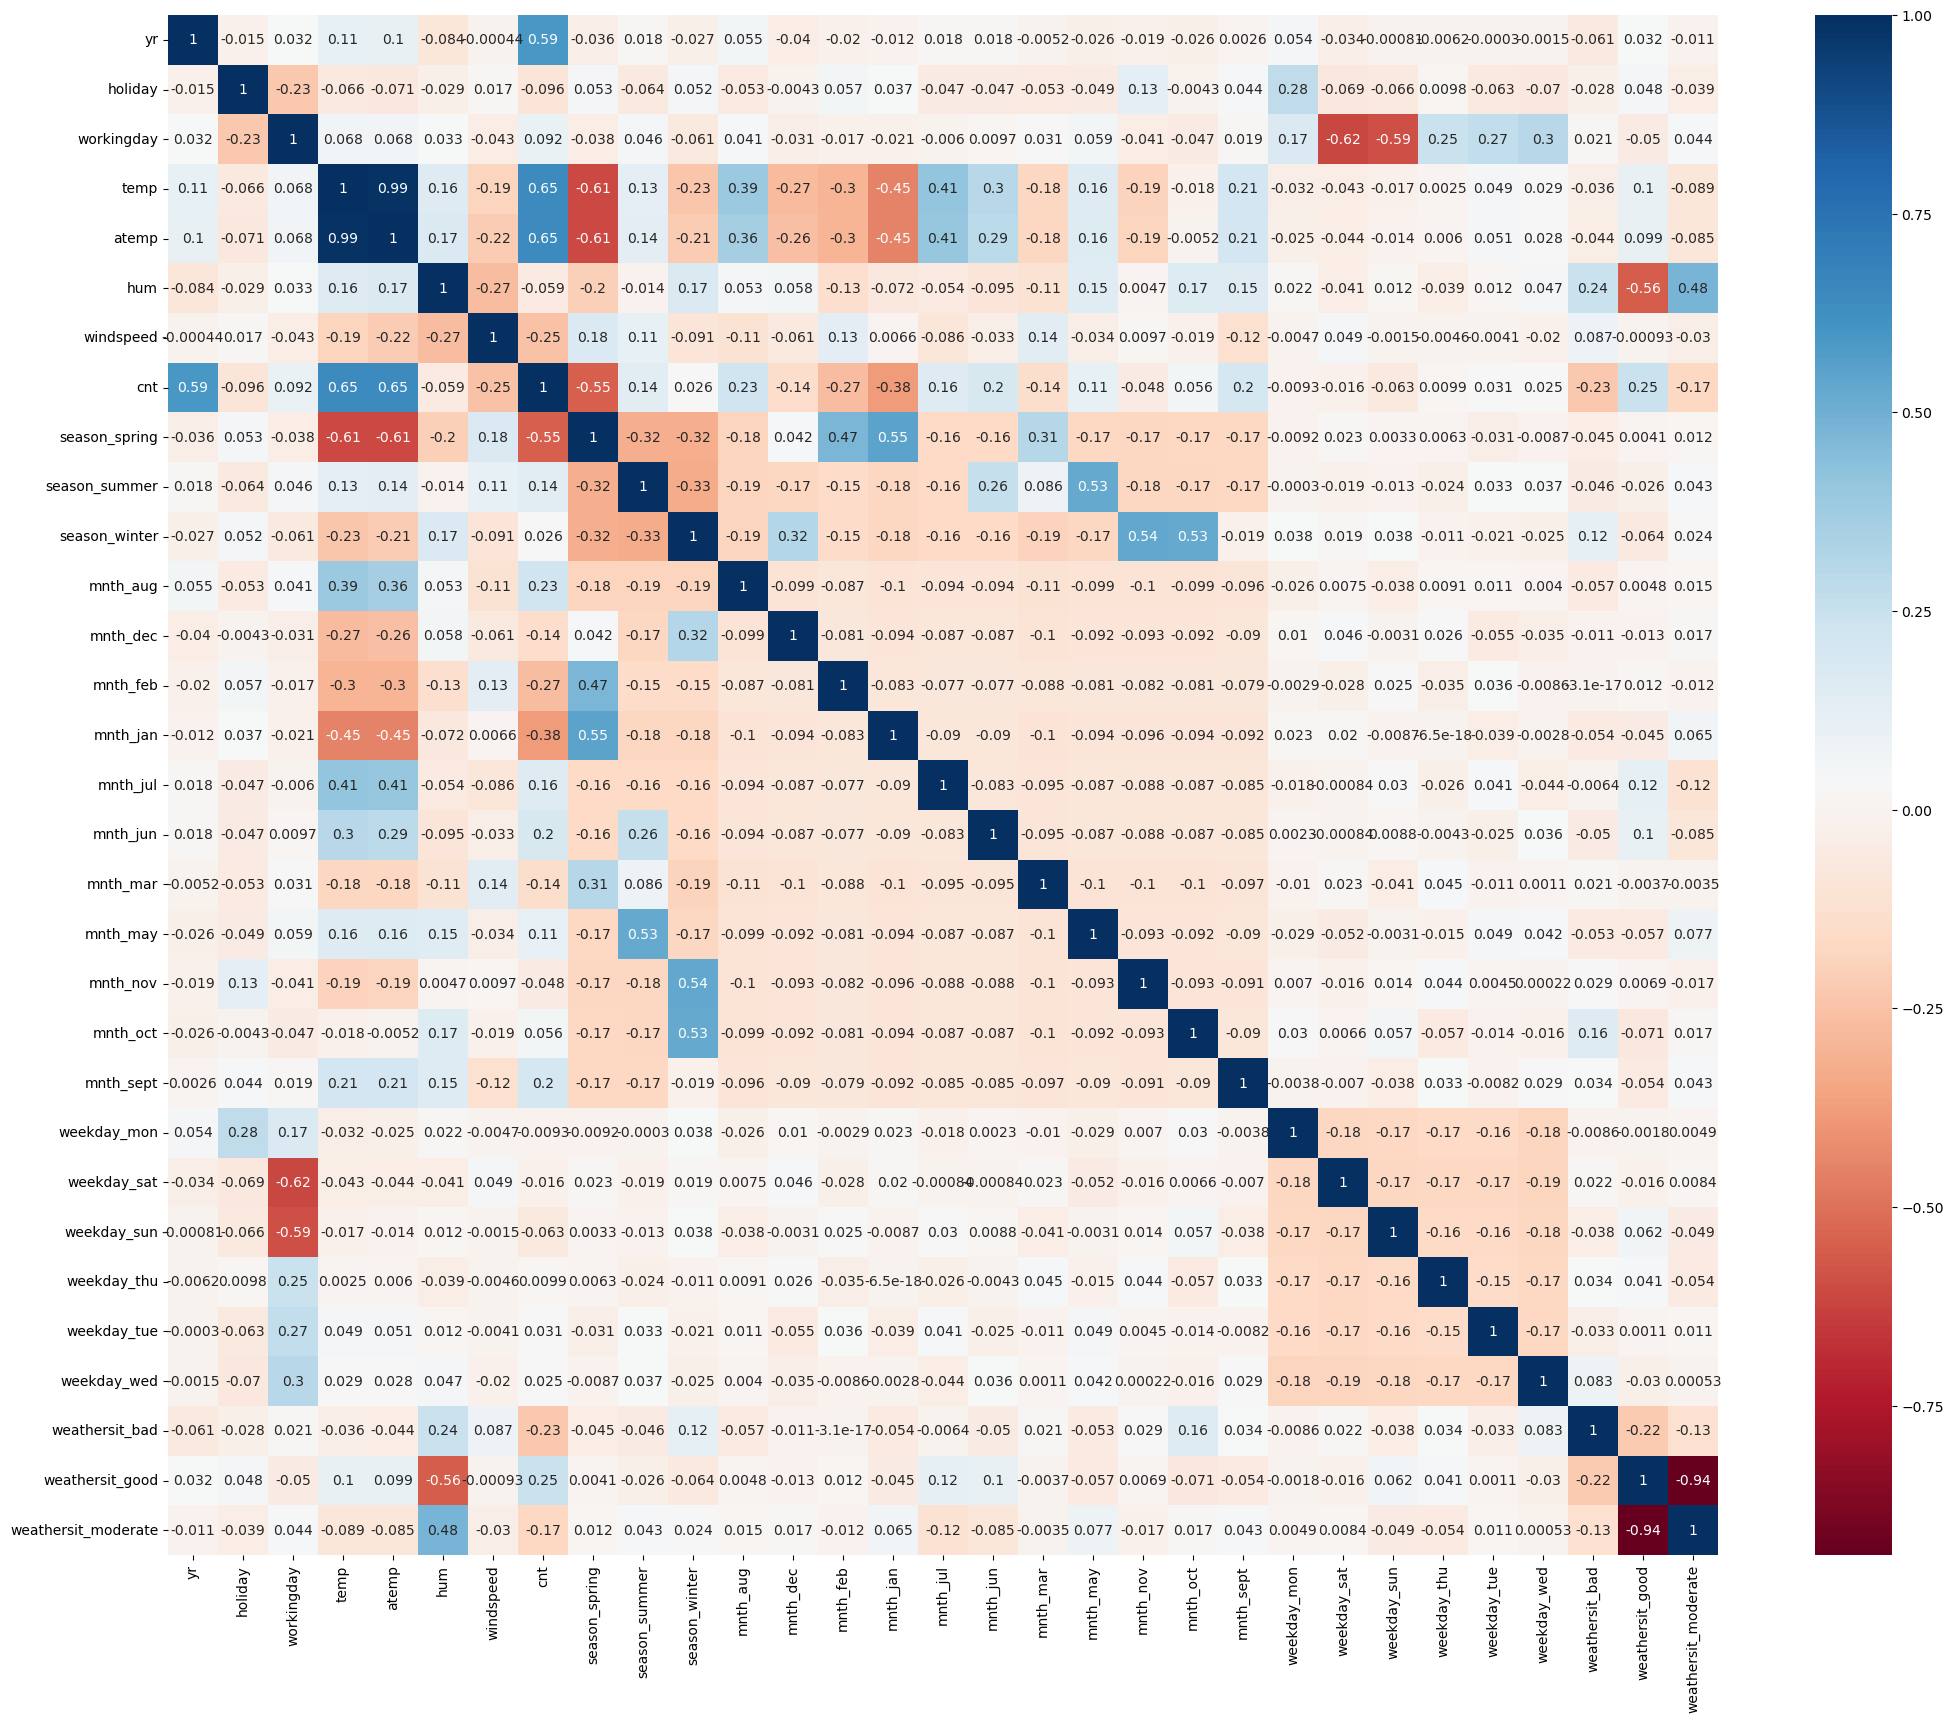

In [37]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdBu")
plt.show()

### Insights
 - The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
 - We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model

### 3.3 Rescaling the Features(Normalizing)

We will be using MinMaxScaler approack using sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,0,0,0,1


In [40]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [41]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,1,0,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,1,0,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [42]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.625490,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.484471,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Observation:
We see features ['temp', 'atemp', 'hum', 'windspeed','cnt'] got rescaled from original values to 0 and 1's.

### Step 4:  Building the linear regression model 
4.1. Fixing Trained Target Variable

In [43]:
y_train = df_train.pop('cnt')

4.2 Fixing Trained Feature(s) Variable

In [44]:
X_train = df_train

### 4.3 Iterative Modeling Process

 - We have almost 30 Predictors to Predict our outcome. Analysing these many predictors can be very hectic.
 - To simplify this process, we will use RFE (Recursive Feature Elimination) method to which will provide us with set of variables ranked in an order of importance (of impacting outcome)
 - We will pass an arbitary number (here 15), which means the method will rank first 15 predictors as 1 & remaining as 0. Creating a generalised function for evaluating Variance Inflation Factor

In [45]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [46]:
rfe = RFE(lm,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [47]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,yr,True,1
27,weathersit_bad,True,1
22,weekday_sat,True,1
20,mnth_sept,True,1
28,weathersit_good,True,1
9,season_winter,True,1
8,season_summer,True,1
14,mnth_jul,True,1
6,windspeed,True,1
1,holiday,True,1


RFE method has successfully evaluated top 15 predictors which will impact the outcome. But, we will not rely on this enitirely and continue validating this 15 features manually by building model one by one and elimating any feature which does not satisfy our requirements.

### Model Building Process -1

In [48]:
col = X_train.columns[rfe.support_]

X_train_rfe = X_train[col]

X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.11e-191
Time:                        16:52:35   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1048      0.030      3.534      0.000       0.047       0.163
yr                      0.2298      0.008     28.647      0.000       0.214       0.246
holiday                -0.0591      0.027     -2.192      0.029      -0.112      -0.006
workingday              0.0430      0.012      3.725      0.000       0.020       0.066
temp                    0.5277      0.033     15.884      0.000       0.462       0.593
hum                    -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed              -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring          -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer           0.0537      0.015      3.631      0.000       0.025       0.083
season_winter           0.0992      0.017      5.815      0.000       0.066       0.133
mnth_jul               -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_sept               0.0820      0.017      4.966      0.000       0.050       0.114
weekday_sat             0.0530      0.015      3.648      0.000       0.024       0.082
weathersit_bad         -0.1096      0.022     -4.926      0.000      -0.153      -0.066
weathersit_good         0.1354      0.010     13.072      0.000       0.115       0.156
weathersit_moderate     0.0790      0.013      6.318      0.000       0.054       0.104
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     1.15e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [49]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,weathersit_good,51.51
14,weathersit_moderate,34.35
6,season_spring,5.02
12,weathersit_bad,4.41
3,temp,3.62
8,season_winter,3.49
7,season_summer,2.62
4,hum,1.91
2,workingday,1.88
11,weekday_sat,1.78


To drop a features from the model we follow the below order:
 - High p value and High VIF 
 - High-low:
    - High p, low VIF 
    - low p, high VIF 
 - low p, low VIF 

### Observation:
In the above model we see p-value of all the features are less than 0.05. The column 'weathersit_good' having high VIF value 51.51, we will proceed dropping the feature 'weathersit_good' with high VIF to rebuild the model. 

In [50]:
col = col.drop(['weathersit_good'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train, X_train_sm)
lr2_model = lr2.fit()
lr2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          2.11e-191
Time:                        16:52:36   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2402      0.036      6.714      0.000       0.170       0.310
yr                      0.2298      0.008     28.647      0.000       0.214       0.246
holiday                -0.0591      0.027     -2.192      0.029      -0.112      -0.006
workingday              0.0430      0.012      3.725      0.000       0.020       0.066
temp                    0.5277      0.033     15.884      0.000       0.462       0.593
hum                    -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed              -0.1809      0.025     -7.118      0.000      -0.231      -0.131
season_spring          -0.0555      0.021     -2.698      0.007      -0.096      -0.015
season_summer           0.0537      0.015      3.631      0.000       0.025       0.083
season_winter           0.0992      0.017      5.815      0.000       0.066       0.133
mnth_jul               -0.0546      0.018     -3.019      0.003      -0.090      -0.019
mnth_sept               0.0820      0.017      4.966      0.000       0.050       0.114
weekday_sat             0.0530      0.015      3.648      0.000       0.024       0.082
weathersit_bad         -0.2450      0.026     -9.395      0.000      -0.296      -0.194
weathersit_moderate    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
6,season_spring,4.24
8,season_winter,3.42
7,season_summer,2.85
13,weathersit_moderate,2.29
0,yr,2.08
11,weekday_sat,1.97


### Observation:
In the above model we see p-value of all the features are less than 0.05.The feature 'hum' having high VIF value 28.46, we will proceed dropping the feature 'hum' with high VIF to rebuild the model.

### Model - 3

In [52]:
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr3 = sm.OLS(y_train, X_train_sm)
lr3_model = lr3.fit()
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          1.28e-188
Time:                        16:52:36   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1576      0.031      5.126      0.000       0.097       0.218
yr                      0.2337      0.008     28.828      0.000       0.218       0.250
holiday                -0.0567      0.027     -2.069      0.039      -0.111      -0.003
workingday              0.0461      0.012      3.931      0.000       0.023       0.069
temp                    0.4915      0.033     15.027      0.000       0.427       0.556
windspeed              -0.1491      0.025     -6.024      0.000      -0.198      -0.100
season_spring          -0.0655      0.021     -3.147      0.002      -0.106      -0.025
season_summer           0.0477      0.015      3.180      0.002       0.018       0.077
season_winter           0.0846      0.017      4.971      0.000       0.051       0.118
mnth_jul               -0.0496      0.018     -2.702      0.007      -0.086      -0.014
mnth_sept               0.0759      0.017      4.537      0.000       0.043       0.109
weekday_sat             0.0579      0.015      3.924      0.000       0.029       0.087
weathersit_bad         -0.2895      0.024    -11.880      0.000      -0.337      -0.242
weathersit_moderate    -0.0822      0.009     -9.514      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       66.828   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.148
Skew:                          -0.682   Prob(JB):                     6.17e-36
Kurtosis:                       5.402   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,season_spring,2.49
6,season_summer,2.34
0,yr,2.07
7,season_winter,1.98
10,weekday_sat,1.96
8,mnth_jul,1.58
12,weathersit_moderate,1.57


### Observation:
The features such as temp, workingday are having high VIF, but there p-value is zero. The feature 'holiday' is having high p-values as complared to other features. Hence dropping the feature 'holiday' to rebuild the model

### Model - 4

In [54]:
col = col.drop(['holiday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr4 = sm.OLS(y_train, X_train_sm)
lr4_model = lr4.fit()
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          7.12e-189
Time:                        16:52:36   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1492      0.031      4.881      0.000       0.089       0.209
yr                      0.2339      0.008     28.756      0.000       0.218       0.250
workingday              0.0545      0.011      4.938      0.000       0.033       0.076
temp                    0.4920      0.033     14.991      0.000       0.427       0.556
windspeed              -0.1499      0.025     -6.040      0.000      -0.199      -0.101
season_spring          -0.0664      0.021     -3.182      0.002      -0.107      -0.025
season_summer           0.0481      0.015      3.196      0.001       0.019       0.078
season_winter           0.0838      0.017      4.910      0.000       0.050       0.117
mnth_jul               -0.0486      0.018     -2.637      0.009      -0.085      -0.012
mnth_sept               0.0740      0.017      4.414      0.000       0.041       0.107
weekday_sat             0.0664      0.014      4.671      0.000       0.038       0.094
weathersit_bad         -0.2883      0.024    -11.795      0.000      -0.336      -0.240
weathersit_moderate    -0.0817      0.009     -9.428      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
4,season_spring,2.38
5,season_summer,2.32
0,yr,2.07
6,season_winter,1.91
9,weekday_sat,1.83
7,mnth_jul,1.58
11,weathersit_moderate,1.57


### Observation:
All the features are having low p-values now. The feature 'temp' is having VIF value greater than 5, but 'temp' is an important feature for the model, hence droping 'workingday' to rebuild the model. 

### Model - 5

In [56]:
col = col.drop(['workingday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr5 = sm.OLS(y_train, X_train_sm)
lr5_model = lr5.fit()
lr5_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.2
Date:                Wed, 10 Apr 2024   Prob (F-statistic):          6.54e-185
Time:                        16:52:37   Log-Likelihood:                 493.80
No. Observations:                 510   AIC:                            -963.6
Df Residuals:                     498   BIC:                            -912.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1935      0.030      6.468      0.000       0.135       0.252
yr                      0.2344      0.008     28.168      0.000       0.218       0.251
temp                    0.4935      0.034     14.698      0.000       0.428       0.560
windspeed              -0.1519      0.025     -5.982      0.000      -0.202      -0.102
season_spring          -0.0693      0.021     -3.244      0.001      -0.111      -0.027
season_summer           0.0472      0.015      3.070      0.002       0.017       0.077
season_winter           0.0791      0.017      4.537      0.000       0.045       0.113
mnth_jul               -0.0515      0.019     -2.734      0.006      -0.089      -0.015
mnth_sept               0.0733      0.017      4.271      0.000       0.040       0.107
weekday_sat             0.0229      0.011      2.006      0.045       0.000       0.045
weathersit_bad         -0.2807      0.025    -11.246      0.000      -0.330      -0.232
weathersit_moderate    -0.0787      0.009     -8.897      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       76.531   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.911
Skew:                          -0.792   Prob(JB):                     3.84e-39
Kurtosis:                       5.412   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.12
2,windspeed,4.62
4,season_summer,2.23
3,season_spring,2.08
0,yr,2.07
5,season_winter,1.78
6,mnth_jul,1.58
10,weathersit_moderate,1.55
7,mnth_sept,1.33
8,weekday_sat,1.18


### Observation:
This model looks good, as there seems to be Very Low Multicollinearity between the predictors and the p-values for all the predictors seems to be significantly low. Though the VIF value for "Temp" variable is 5.12, this seems to be important in this analysis, hence we will continue keeping the feature in the model. For now, we will consider this as our final model and analyse the linear regression assumption, residual analysis and evaluation of test data in the final model. 

### Step 5 : Residual analysis and Final Model Interpretation For Linear Regrssion Assumptions

### According to Hypothesis Testing:
Hypothesis testing states that:
 - <b> Null Hypothesis </b> H0:B1=B2=...=Bn=0 (Here co-efficients will be equal to zero)
 - <b> Alternate Hyposthesis </b> H1: at least one B(i) != 0 (Atleast one co-efficients will not be equal to Zero)

### From the model-5 summary,
It is evident that all the coefficients are not equal to zero, hence <b> We reject the null hypothesis. </b>

In [58]:
lr5_model.params

const                  0.193486
yr                     0.234415
temp                   0.493534
windspeed             -0.151913
season_spring         -0.069280
season_summer          0.047234
season_winter          0.079120
mnth_jul              -0.051523
mnth_sept              0.073266
weekday_sat            0.022892
weathersit_bad        -0.280719
weathersit_moderate   -0.078651
dtype: float64

In [59]:
df_bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

### The equation of best fitted surface based on model-5

<b> <span style='color:blue'> cnt(Target Variable) = 0.193486 + (yr x 0.234415) + (temp x 0.493534) - (windspeed x -0.151913) -
   (season_spring x 0.069280) + (season_summer x 0.047234) + (season_winter x 0.079120) - (mnth_jul x 0.051523) + 
    (mnth_sept x 0.073266) + (weekday_sat * 0.022892) - (weathersit_bad x 0.280719) - (weathersit_moderate x 0.078651)
    </span>
    </b>
        
    

### 5.1 Residual Analysis of the train data

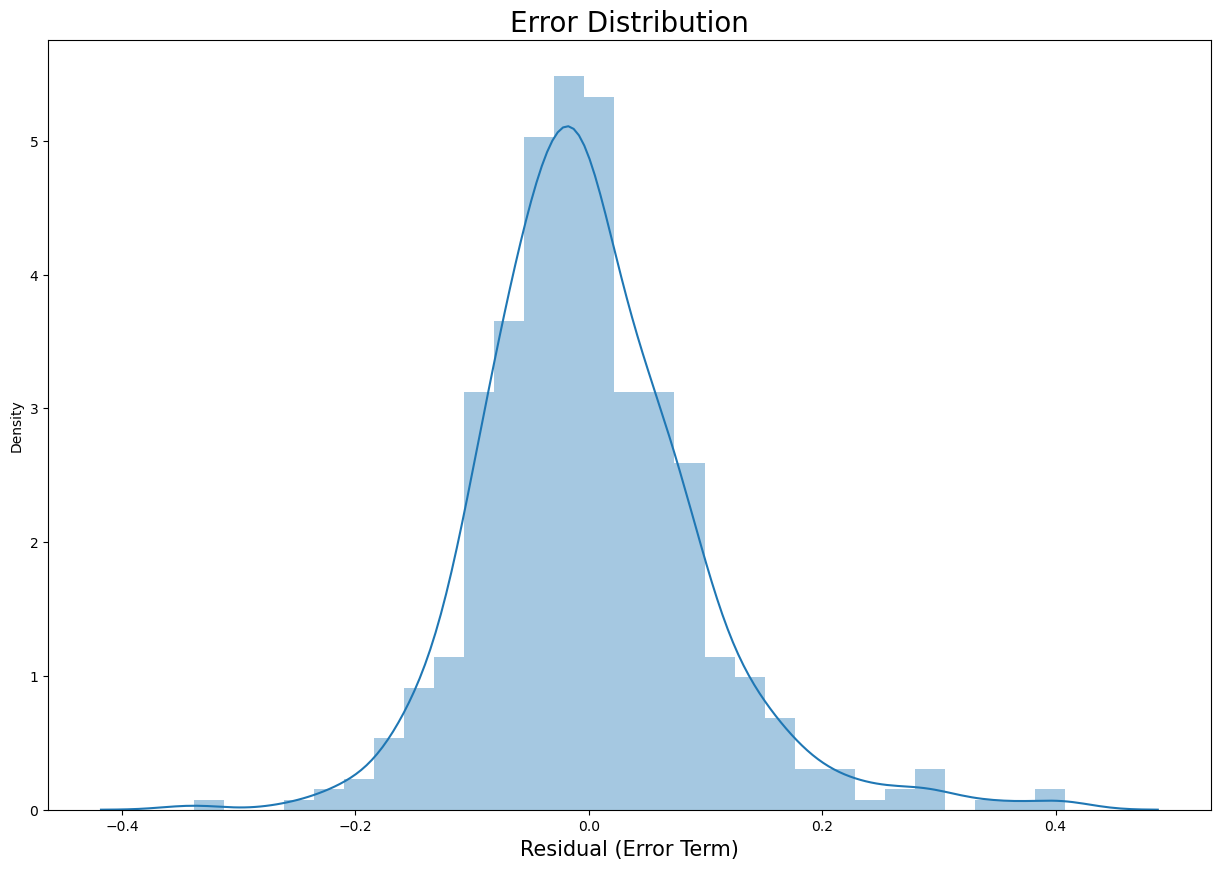

In [60]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
y_train_pred = lr5_model.predict(X_train_sm)
residual = y_train_pred - y_train
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 15})
plt.title('Error Distribution', fontdict={'fontsize': 20})
sns.distplot(residual,ax=ax)
plt.show()


### Note:
<b> From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that the model has handled the assumption of Error Normal Distribution properly <b>

###  5.2: Validating homoscedasticity

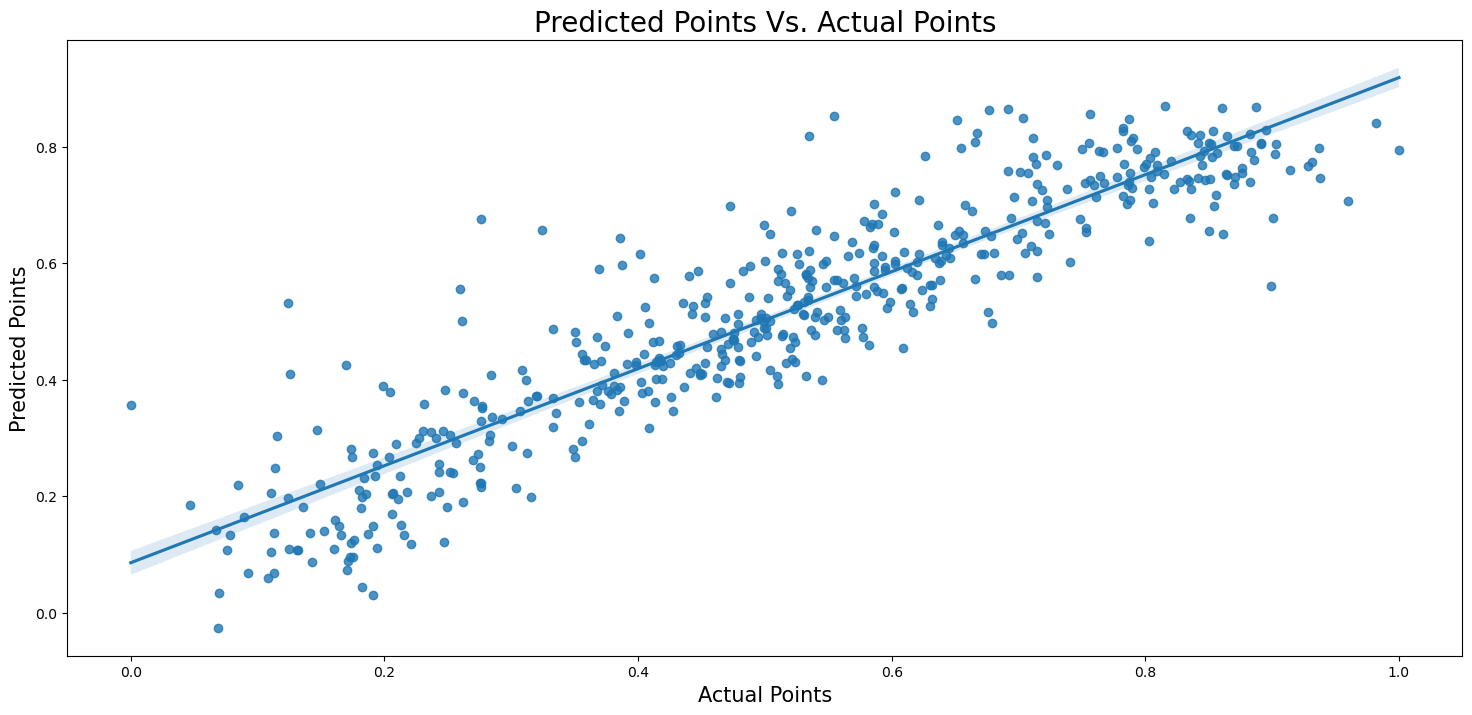

In [61]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x=y_train, y=y_train_pred, ax=ax)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

Observation: From the above graph, we can say that residuals are equal distributed across predicted value. This means we see equal variance and we do NOT observe high concentration of data points in certain region & low conecentarion in certain regions. This proves Homoscedasticity of Error Terms

### 5.3 Validating Independence of residuals

In [62]:
print('The Durbin-Watson value for Final Model lr 5 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),2))

The Durbin-Watson value for Final Model lr 5 is 2.01


### 5.4 Validating Linearity

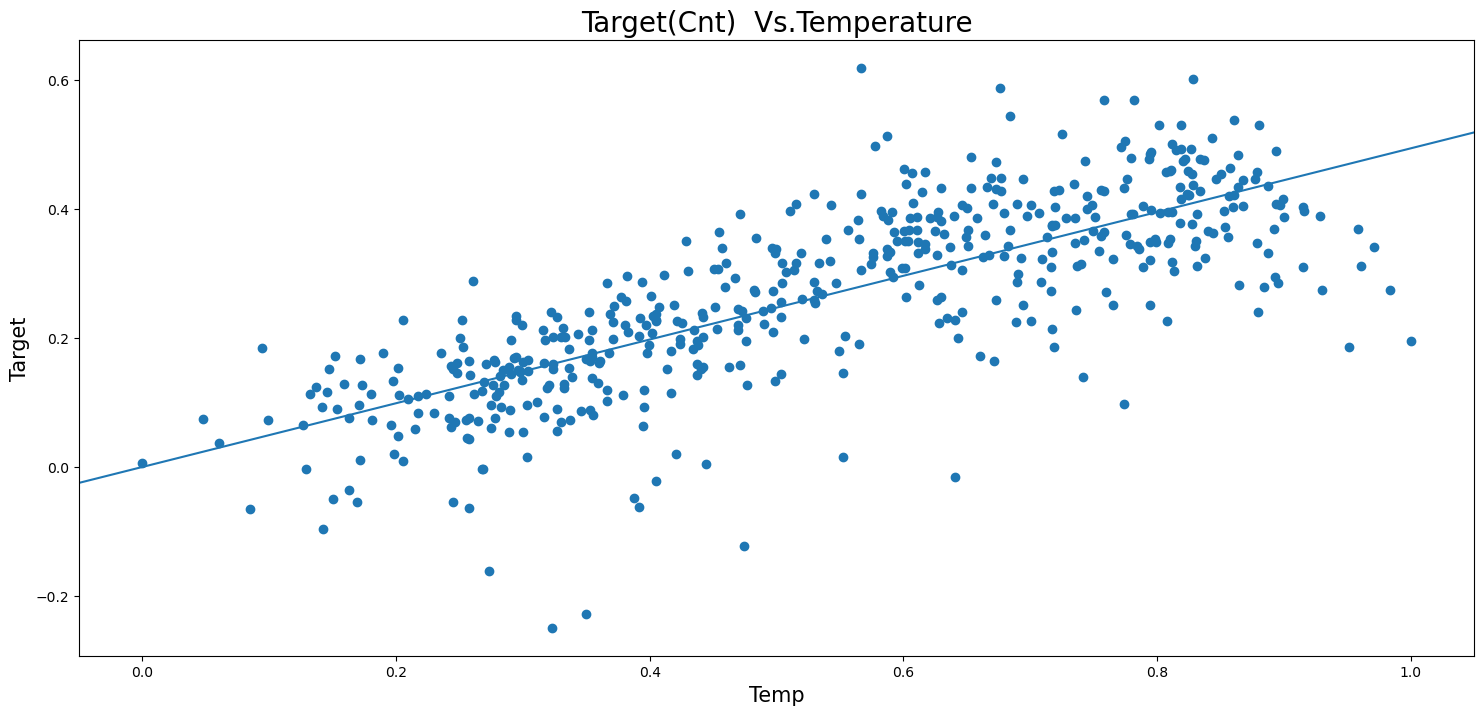

In [63]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sm.graphics.plot_ccpr(lr5_model, 'temp',ax=ax)
plt.title('Target(Cnt)  Vs.Temperature', fontdict={'fontsize': 20})
plt.xlabel('Temp', fontdict={'fontsize': 15})
plt.ylabel('Target', fontdict={'fontsize': 15})
plt.show()

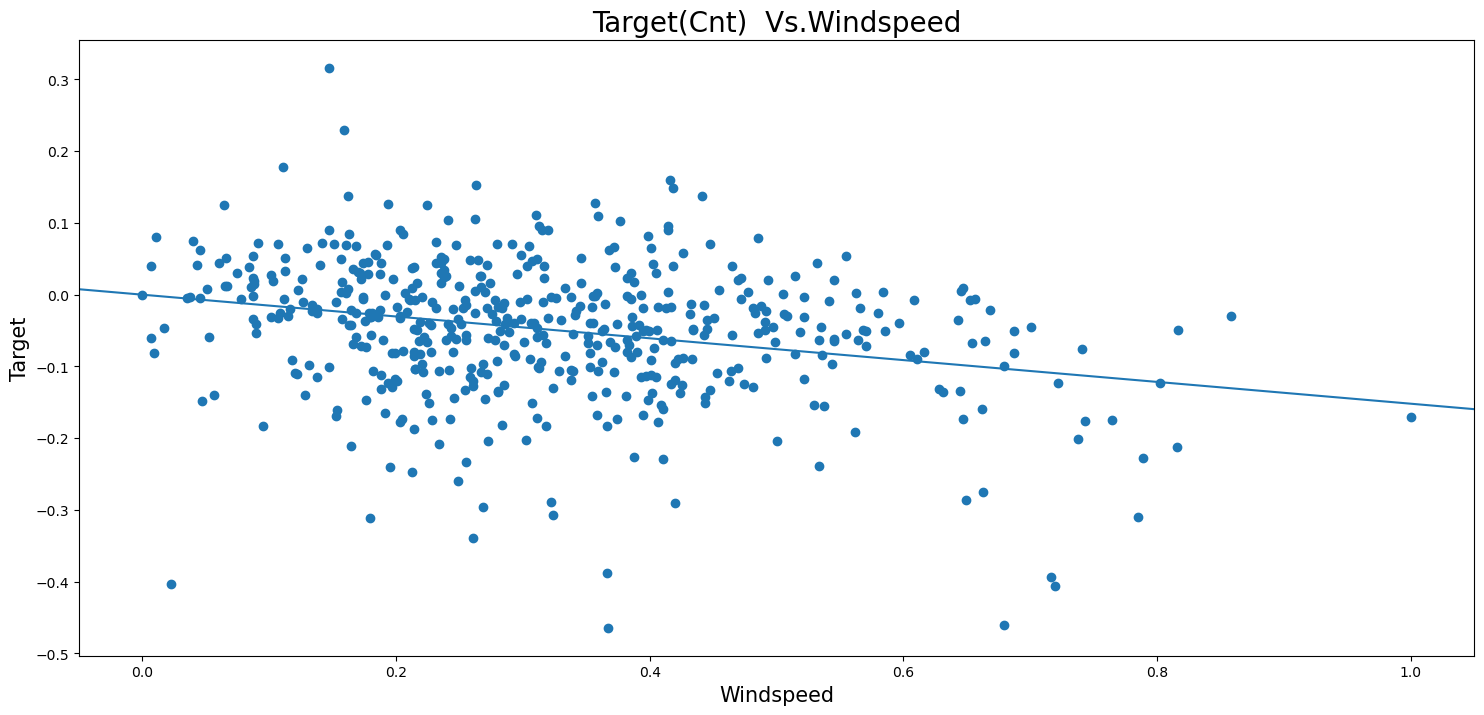

In [64]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sm.graphics.plot_ccpr(lr5_model, 'windspeed', ax=ax)
plt.title('Target(Cnt)  Vs.Windspeed', fontdict={'fontsize': 20})
plt.xlabel('Windspeed', fontdict={'fontsize': 15})
plt.ylabel('Target', fontdict={'fontsize': 15})
plt.show()


The above graphs shows linear relation between features(temp,windspeed) and the target variable. Hence it proves linearity of the model. 

### 5.5 Validating Absence of Multicolinearity

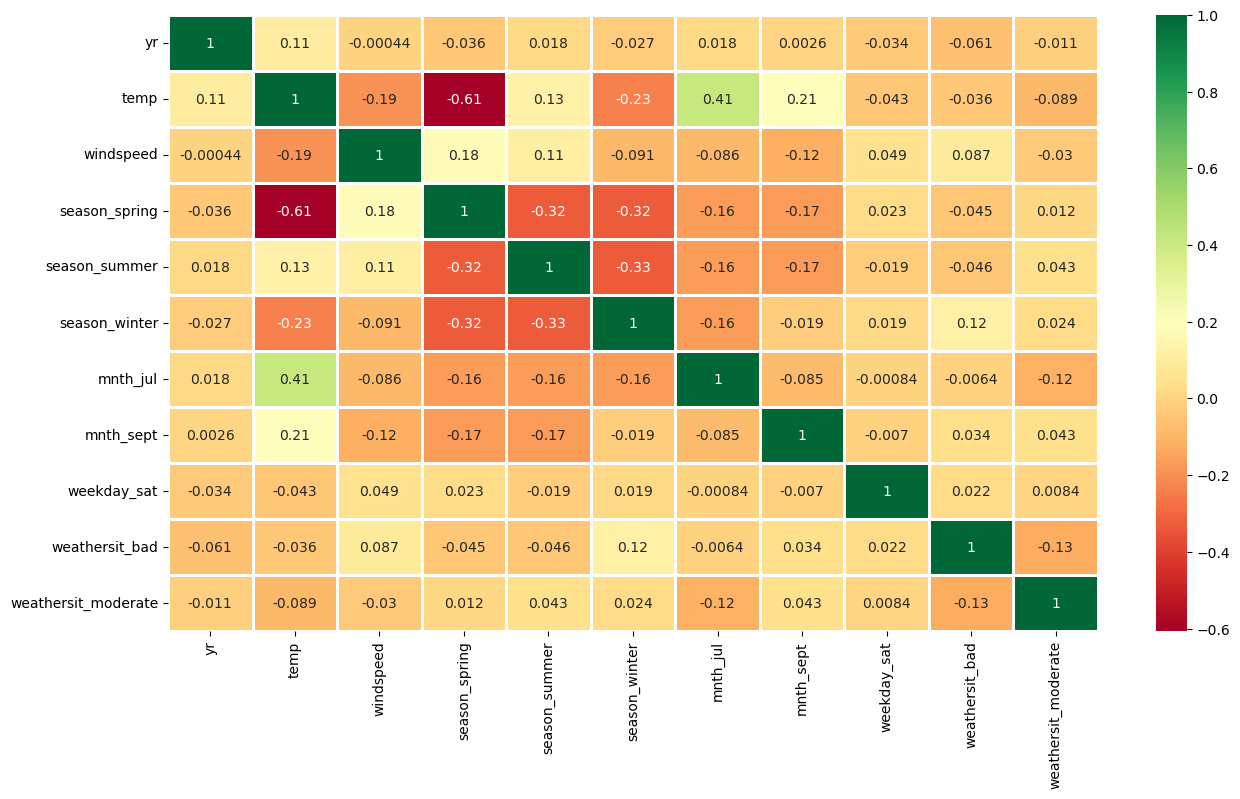

In [65]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

The above graph shows the features are not highly co-related with each other. Hence proving the model has absence of colinearlity. 

### Step 6: Model Evaluation - R Sqaured Observation for Train Data

In [66]:
from sklearn.metrics import r2_score,mean_squared_error

r2_score(y_train, y_train_pred)

0.8320216538688142

<b> Here the R-squared value of the model is 0.8320216538688142 </b>

### Step 7: Prediction on Test Data

### 7.1 Understanding the test data 

In [67]:
num_vars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [68]:
df_test[num_vars].head(10)

,temp,atemp,hum,windspeed,cnt
184,29.793347,33.27085,63.7917,5.459106,6043
535,32.082500,36.04875,59.2083,7.625404,6211
299,19.270000,22.85230,81.2917,13.250121,2659
221,31.433347,34.24915,42.4167,13.417286,4780
152,29.315000,32.19710,30.5000,19.583229,4968
404,10.865000,13.09940,56.2083,13.000479,3830
198,30.613347,35.19625,65.1250,14.458868,4458
171,27.914153,31.88230,77.0417,11.458675,4835
512,29.212500,33.96500,67.6250,13.166907,6043
200,31.501653,37.34250,70.7083,7.625739,4332


### 7.2 Scaling of Test Data

In [69]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,1,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,1,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,1,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,1,0,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,1,0,0,0,1,0


In [70]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.654545,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 7.3 Fixing Test Target Variable

In [71]:
y_test = df_test.pop('cnt')

### 7.4 Fixing Test Feature(s) Variable

In [72]:
X_test = df_test

In [73]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   220 non-null    int64  
 1   holiday              220 non-null    int64  
 2   workingday           220 non-null    int64  
 3   temp                 220 non-null    float64
 4   atemp                220 non-null    float64
 5   hum                  220 non-null    float64
 6   windspeed            220 non-null    float64
 7   season_spring        220 non-null    int32  
 8   season_summer        220 non-null    int32  
 9   season_winter        220 non-null    int32  
 10  mnth_aug             220 non-null    int32  
 11  mnth_dec             220 non-null    int32  
 12  mnth_feb             220 non-null    int32  
 13  mnth_jan             220 non-null    int32  
 14  mnth_jul             220 non-null    int32  
 15  mnth_jun             220 non-null    int32 

### 7.5 Filtering Test Input (Reserving Required Features)

In [74]:
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [75]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   const                220 non-null    float64
 1   yr                   220 non-null    int64  
 2   temp                 220 non-null    float64
 3   windspeed            220 non-null    float64
 4   season_spring        220 non-null    int32  
 5   season_summer        220 non-null    int32  
 6   season_winter        220 non-null    int32  
 7   mnth_jul             220 non-null    int32  
 8   mnth_sept            220 non-null    int32  
 9   weekday_sat          220 non-null    int32  
 10  weathersit_bad       220 non-null    int32  
 11  weathersit_moderate  220 non-null    int32  
dtypes: float64(3), int32(8), int64(1)
memory usage: 15.5 KB


In [76]:
X_test_new.head()

,const,yr,temp,windspeed,season_spring,season_summer,season_winter,mnth_jul,mnth_sept,weekday_sat,weathersit_bad,weathersit_moderate
184,1.0,0,0.831783,0.084219,0,0,0,1,0,0,0,1
535,1.0,1,0.901354,0.153728,0,1,0,0,0,0,0,0
299,1.0,0,0.511964,0.334206,0,0,1,0,0,0,0,1
221,1.0,0,0.881625,0.339570,0,0,0,0,0,0,0,0
152,1.0,0,0.817246,0.537414,0,1,0,0,0,0,0,0


### 7.6 Predicting Test Data Using Developed Model

In [77]:
y_pred = lr5_model.predict(X_test_new)

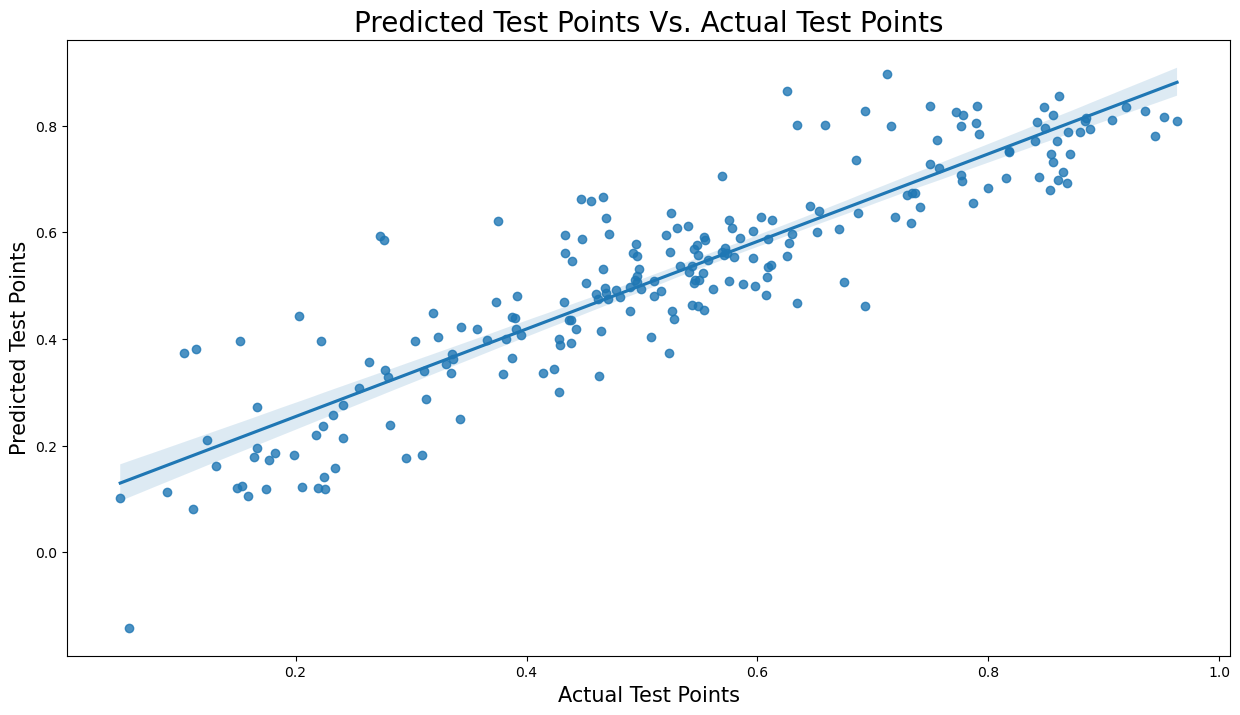

In [78]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
corr_plot = sns.regplot(x=y_test, y=y_pred,ax=ax)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

In [79]:
y_pred.head()

184    0.461031
535    0.896630
299    0.395856
221    0.577013
152    0.562418
dtype: float64

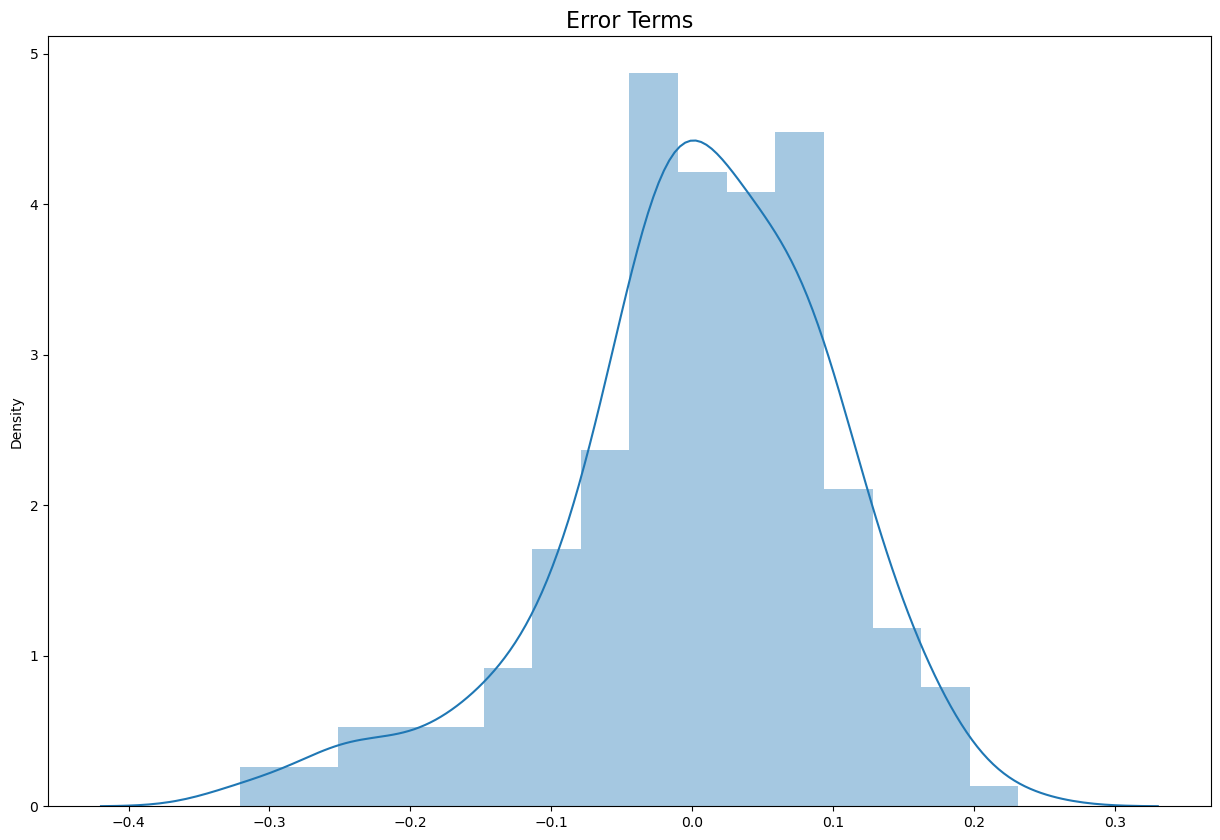

In [80]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
res_test = y_test - y_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

### Observation:
 - The regression plot of actual output data(y_test) and predicated output(y_pred) are having a linear relation. 
 - The distribution plot of error term shows the normal distribution with mean at Zero.

### 7.7 Generating R-Square

In [81]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.8040630045169548

#### The R-Squared value on the test data is 0.8040630045169548

### 7.8 Generating Adjusted R2

In [82]:
X_test_new.shape

(220, 12)

In [83]:
n= X_test_new.shape[0]
n

220

In [84]:
p = X_test_new.shape[1]
p

12

In [85]:
adjusted_r2 = 1-(1-r2_score)*(n-1)/(n-p-1)
adjusted_r2

0.7927043381121406

#### The adjusted R-squared value on the test data is 0.7927043381121406

In [86]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0094


### Step 8: Final Observations on Test and Train data

### Final Comparision of R-squared (R2) and Adjsuted R-squared(Adjusted R2):

 - R-sqaured (R2) value on the train set: <b> 0.832 </b> [Train values results are taken from Model-5]
 - Adjusted R-squared (Adjusted R2) value on the train set: <b> 0.828 </b> [Train values results are taken from Model-5]
 - R-sqaured (R2) value on the test set: <b> 0.804 </b> [calculated value]
 - Adjusted R-squared (Adjusted R2) value on the test set: <b> 0.793 </b> [calculated value]
 
 #### So we can conclude that, the model seems to be a decent model that can very well Generalise various datasets. What model have learnt on training set,s very much able to generalised on the test set.
### It seems to be a pretty good model.

In [87]:
lr5_model.params 

const                  0.193486
yr                     0.234415
temp                   0.493534
windspeed             -0.151913
season_spring         -0.069280
season_summer          0.047234
season_winter          0.079120
mnth_jul              -0.051523
mnth_sept              0.073266
weekday_sat            0.022892
weathersit_bad        -0.280719
weathersit_moderate   -0.078651
dtype: float64

### Final Observations:
As per the final model 5, the top 3 predictor variables that influences the bike booking are:
 - <b> Temperature (temp): </b>  A coefficient value of ‘0.493534’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.493534 units.
 - <b> Year (yr): </b>  A coefficient value of ‘0.234415’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.234415 units. 
 - <b> mnth_sept: </b> A coefficient value of ‘0.073266’ indicated that a unit increase in mnth_sept variable increases the bike hire numbers by 0.073266 units. 
<br>
<br> <b> So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking.</b> </br> 
<br> The next best features that can also be considered are, </br>
 - <b> windspeed: </b> A coefficient value of ‘-0.151913’ indicated that a unit increase in windspeed variable decreases the bike hire numbers by 0.151913 units. The windspeed is negatively related to the output. 
 - <b> season_winter: </b> A coefficient value of ‘0.079120’ indicated that a unit increase in season_winter variable increases the bike hire numbers by 0.079120 units.
 - <b> weathersit_bad: </b> A coefficient value of ‘-0.280719’ indicated that a unit increase in windspeed variable decreases the bike hire numbers by 0.280719 units.
 

###  <span style='color:blue'> <b>The equation of our best fitted line is: </b> <br>
 
    
<b> <span style='color:blue'> cnt(Target Variable) = 0.193486 + (yr x 0.234415) + (temp x 0.493534) - (windspeed x -0.151913) -
   (season_spring x 0.069280) + (season_summer x 0.047234) + (season_winter x 0.079120) - (mnth_jul x 0.051523) + 
    (mnth_sept x 0.073266) + (weekday_sat * 0.022892) - (weathersit_bad x 0.280719) - (weathersit_moderate x 0.078651)
    </b>
</span>